# Data analysis

## Download Dataset

Fetching MINST dataset from static url and saving to dataset directory

In [1]:
import numpy as np
%%time

from clustering.mnist import download_MNIST, store_MNIST

#data = download_MNIST()
#store_MNIST(data=data)

UsageError: Line magic function `%%time` not found.


## Reading Dataset

Reading just downloaded dataset

In [2]:
from clustering.mnist import read_MNIST

data = read_MNIST()
X, y = data

data

Reading MNIST
Reading C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\datasets\pixels.csv
Reading C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\datasets\labels.csv


[Features: 784; Length: 70000]

## Visualizing data

In [3]:
from clustering.utils import plot_digit
import pandas as pd


def plot(x: pd.DataFrame, row_idx: int, save: bool = False, file_name = 'image.png'):
    """
    Plots a certain digit corresponding to a certain row in a dataframe
    :param x: dataframe of images
    :param row_idx: index row for image to be plotted
    :param save: if true, figure is saved in images directory
    :param file_name:  name of file if stored (including extension)
    """
    pixels = list(x.iloc[row_idx,:].values)
    plot_digit(pixels=pixels, save=save, file_name=file_name)

Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\images\0.svg


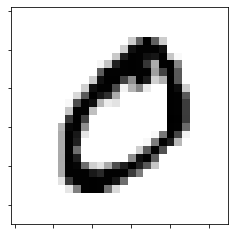

Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\images\1.svg


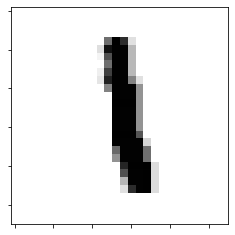

Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\images\2.svg


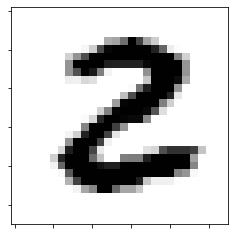

Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\images\3.svg


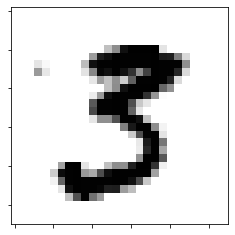

Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\images\4.svg


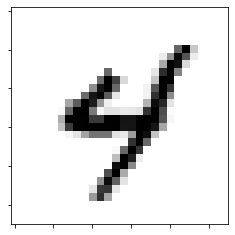

Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\images\5.svg


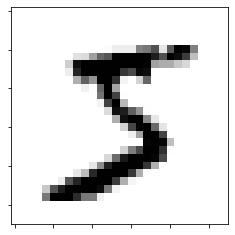

Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\images\6.svg


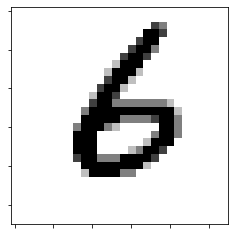

Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\images\7.svg


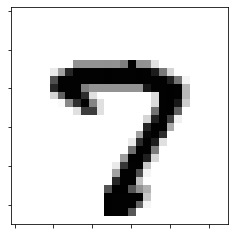

Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\images\8.svg


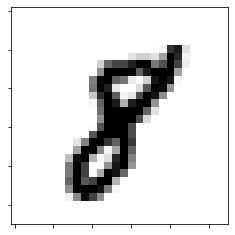

Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\images\9.svg


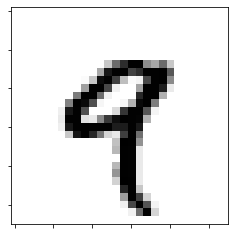

In [4]:
for idx, n in zip(
    [1, 6, 25, 49, 115, 0, 66, 52, 17, 4],
    list(range(10))
):
    plot(x=X, row_idx=idx, save=True, file_name=f"{n}")

## Digit distribution

Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\images\histo.svg


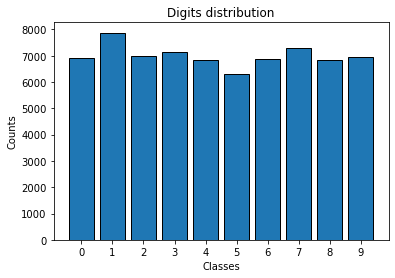

In [5]:
data.plot_digit_distribution(save=True, file_name='histo')

## Digit visualization

In [6]:
import os
import numpy as np
import matplotlib as mplt
from matplotlib import pyplot as plt

from clustering.model.model import Dataset
from clustering.settings import IMG_EXT
from clustering.globals import get_images_dir

def plot_2d(data: Dataset, save: bool = False, file_name: str = '2dim'):
    """
    Plot digits in a 2-dimensional space
    :param data: dataset to plot
    :param save: saving plot to image directory
    :param file_name: name of output file
    """

    # principal component analysis producing two components
    X2, y2 = data.make_pca(n_components=2).rescale()

    # colors
    colors = ['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'magenta', 'purple', 'black', 'gray']

    # plotting points
    plt.figure(figsize=(8,8))
    plt.scatter(X2.loc[:,0], X2.loc[:,1], c=y2, cmap=mplt.colors.ListedColormap(colors), alpha=0.7)

    #
    plt.title("Digits - 2 Components")

    # legend
    cb = plt.colorbar()
    loc = np.arange(0,max(y2),max(y2)/float(len(colors)))
    cb.set_ticks(loc)
    cb.set_ticklabels([n for n in list(range(10))])

    if save:
        out = os.path.join(get_images_dir(), f"{file_name}.{IMG_EXT}")
        plt.savefig(out)


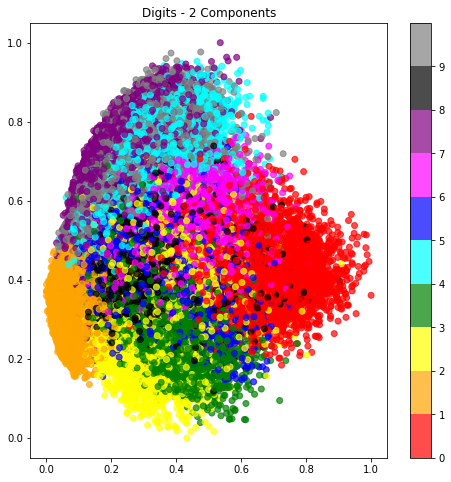

In [7]:
plot_2d(data=data, save=True)

## Restricting cardinality of dataset

In [8]:
data_s = data.reduce_to_percentage(percentage=0.1)
data_s

[Features: 784; Length: 7000]

In [9]:
X_s, y_s = data_s

Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\images\histo_s.svg


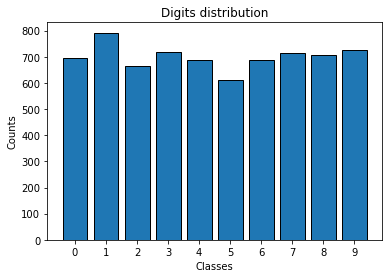

In [10]:
data_s.plot_digit_distribution(save=True, file_name='histo_s')

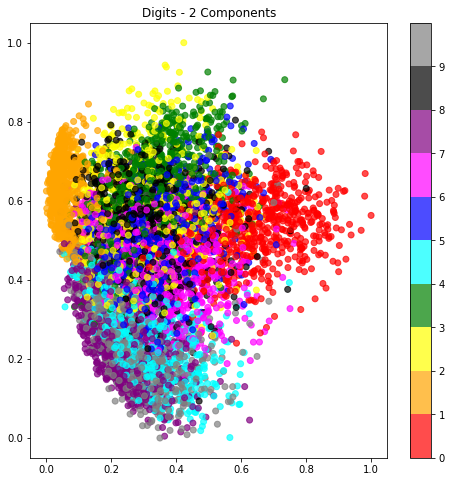

In [11]:
plot_2d(data=data_s, save=True, file_name="2dim_s")

In [12]:
from clustering.mnist import store_MNIST_SMALL

store_MNIST_SMALL(data=data_s)

Storing small MNIST
Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\datasets\pixels_s.csv
Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\datasets\labels_s.csv
